In [ ]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import matplotlib.pyplot as plt

In [2]:
# генерируем случайные данные
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

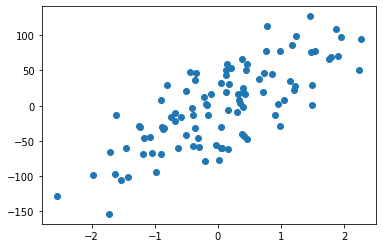

In [3]:
# посмотрим что получилось
plt.plot(x, y, 'o')
plt.show()

In [4]:
# преобразуем X к следующему виду, добавим классы
X = np.c_[np.ones(x.shape[0]), x, y]
cl=np.where(X.T[2].T<(-50*X.T[1].T**7+20),0,1)
X.shape, cl.shape

((100, 3), (100,))

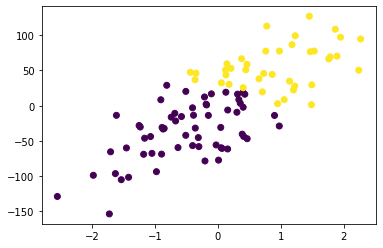

In [5]:
plt.scatter(X.T[1].T, X.T[2].T, c=cl)
plt.show()

### Логистическая регрессия

In [6]:
def gradient_descent_lr(alpha, X, cl, numIterations):
    """
    Функция реализует алгоритм градиентного спуска логистической регрессии
    """
    m = X.shape[0] # 100
    theta = np.random.random(X.shape[1])/20    # (3,)
    cost=np.ones(numIterations)
    for iter in range(0, numIterations):
        yhat = 1 / (1 + np.exp(-np.dot(X,theta)))    # (100,)
        loss = - (cl*np.log(yhat) + (1-cl)*np.log(1-yhat))
        J = 1/m * sum(loss)  # функция cost
        # print( "iter %s | J: %.3f" % (iter, J) )
        dtheta = np.dot(X.transpose(),(yhat-cl))         
        theta = theta - alpha * dtheta  # update
        cost[iter]=J
    plt.plot(cost)
    plt.show()
    return theta

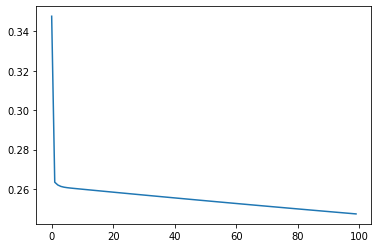

array([-0.10474894,  0.05233953,  0.07266582])

In [7]:
gradient_descent_lr(0.0001, X, cl, 100)

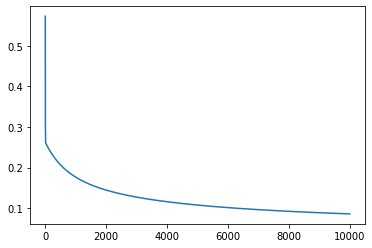

CPU times: user 553 ms, sys: 7.17 ms, total: 561 ms
Wall time: 561 ms


In [8]:
%%time
theta = gradient_descent_lr(0.0001, X, cl, 10000)

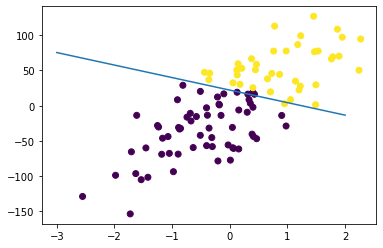

In [9]:
# построим полученную линию из theta
x1 = range(-3,3)
y1 = - (theta[0] + theta[1] * x1) / theta[2]

# рисуем результат
plt.scatter(X.T[1].T, X.T[2].T, c=cl)
plt.plot(x1,y1)
plt.show()

### Используем готовые методы

In [10]:
from sklearn import linear_model

In [11]:
model = linear_model.SGDClassifier(alpha = 0.0001, max_iter = 10000 )

In [12]:
%%time 
model.fit( X, cl )

CPU times: user 1.5 ms, sys: 373 µs, total: 1.88 ms
Wall time: 1.64 ms


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
model.coef_

array([[-380.91573682,  251.45701454,  130.39935903]])

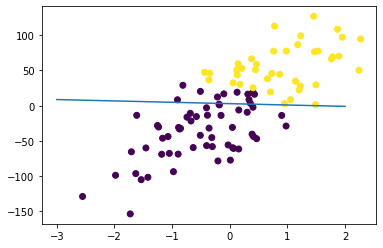

In [14]:
x2 = range(-3,3)
y2 = - (model.coef_[0,0] + model.coef_[0,1] * x1) / model.coef_[0,2]

# рисуем результат
plt.scatter(X.T[1].T, X.T[2].T, c=cl)
plt.plot(x2,y2)
plt.show()